In [ ]:
!pip install nltk gensim requests


In [ ]:
import tensorflow as tf
print("GPU in use: ", tf.config.list_physical_devices('GPU'))


GPU in use:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!pip install beautifulsoup4


In [ ]:
import requests
from bs4 import BeautifulSoup

# Genius API base URL and token (replace with your actual token)
GENIUS_API_TOKEN = 'imHckxi7H3AyiX8EOxaZDFEqRgL3Vk-4WdlRiBvsl-49xf5JNjPYReEMJw8pyLtd'
base_url = "https://api.genius.com"

# Function to search for songs on Genius
def search_song(song_title, artist_name):
    search_url = base_url + "/search"
    headers = {'Authorization': 'Bearer ' + GENIUS_API_TOKEN}
    params = {'q': song_title + ' ' + artist_name}
    response = requests.get(search_url, headers=headers, params=params)
    return response.json()

# Function to get the song's lyrics URL from Genius
def get_song_lyrics(song_title, artist_name):
    song_data = search_song(song_title, artist_name)
    song_info = None
    for hit in song_data['response']['hits']:
        if artist_name.lower() in hit['result']['primary_artist']['name'].lower():
            song_info = hit
            break

    if song_info:
        return song_info['result']['url']  # This is the Genius lyrics URL
    else:
        return None

def scrape_lyrics(song_title, artist_name):
    # Replace spaces with hyphens for the URL (common format in song URLs)
    song_title_url = song_title.replace(" ", "-").lower()
    artist_name_url = artist_name.replace(" ", "-").lower()

    # Construct the URL for the lyrics page on Genius
    url = f"https://genius.com/{artist_name_url}-{song_title_url}-lyrics"

    # Send a GET request to fetch the HTML content
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content with BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the lyrics container
        lyrics_container = soup.find('div', class_='Lyrics__Container-sc-1ynbvzw-6') or \
                          soup.find('div', class_='lyrics') or \
                          soup.find('div', class_='Lyrics__Root-sc-1ynbvzw-0')

        if lyrics_container:
            # Extract and clean the lyrics text
            lyrics = lyrics_container.get_text(separator='\n')
            return lyrics.strip()  # Strip any leading/trailing whitespace
        else:
            return "Lyrics container not found."
    else:
        return f"Failed to retrieve the lyrics. Status code: {response.status_code}"

# Taking user input for song title and artist name
song_title = input("Enter the song title: ")
artist_name = input("Enter the artist name: ")

# Fetching lyrics URL
lyrics_url = get_song_lyrics(song_title, artist_name)

if lyrics_url:
    print(f"Lyrics URL for '{song_title}' by {artist_name}: {lyrics_url}")
    # Scraping lyrics
    lyrics = scrape_lyrics(song_title, artist_name)  # Fixed function call
    print(f"Lyrics for '{song_title}' by {artist_name}:\n{lyrics}")
else:
    print(f"Lyrics not found for '{song_title}' by {artist_name}")


Enter the song title: Shape of You
Enter the artist name: Ed Sheeran
Lyrics URL for 'Shape of You' by Ed Sheeran: https://genius.com/Ed-sheeran-shape-of-you-lyrics
Lyrics for 'Shape of You' by Ed Sheeran:
360 Contributors
Translations
Türkçe
Español
Português
Ελληνικά
Deutsch
Français
Italiano
العربية
Polski
한국어
Српски
Shape of You Lyrics
[Verse 1]
A club isn't the best place to find a lover
So the bar is where I go (Mm)
Me and my friends at the table doin' shots
Drinkin' fast and then we talk slow (Mm)
And you come over and start up a conversation with just me
And trust me, I'll give it a chance now (Mm)
Take my hand, stop, put Van the Man on the jukebox
And then we start to dance and now I'm singin' like
[Pre-Chorus]
Girl, you know I want your love
Your love was handmade for somebody like me
Well, come on now, follow my lead
I may be crazy, don't mind me
Say, "Boy, let's not talk too much"
Grab on my waist and put that body on me
Well, come on now, follow my lead
Come, come on now, f

In [ ]:
import re

def clean_lyrics(lyrics):
    # Remove contributor mentions
    lyrics = re.sub(r'^\d+\s+contributors$', '', lyrics, flags=re.MULTILINE)  # Remove lines like "38 contributors"
    lyrics = re.sub(r'^\d+\s+embed$', '', lyrics, flags=re.MULTILINE)  # Remove lines like "8 embed"

    # Remove lines with section indicators (e.g., "verse", "chorus", "bridge", "outro")
    lyrics = re.sub(r'^\s*(verse|chorus|bridge|outro|all)\s+\w+', '', lyrics, flags=re.IGNORECASE | re.MULTILINE)

    # Remove text within brackets (e.g., [Chorus: Harry])
    lyrics = re.sub(r'\[.*?\]', '', lyrics)

    # Remove extra newlines and leading/trailing whitespace
    lyrics = re.sub(r'\n+', '\n', lyrics)  # Replace multiple newlines with a single newline
    lyrics = lyrics.strip()  # Remove leading/trailing whitespace

    # Normalize text: lowercase and remove punctuation
    lyrics = lyrics.lower()
    lyrics = re.sub(r'[^\w\s]', '', lyrics)  # Remove punctuation

    return lyrics

# Example usage
cleaned_lyrics = clean_lyrics(lyrics)
print(cleaned_lyrics)


360 contributors
translations
türkçe
español
português
ελληνικά
deutsch
français
italiano
العربية
polski
한국어
српски
shape of you lyrics
a club isnt the best place to find a lover
so the bar is where i go mm
me and my friends at the table doin shots
drinkin fast and then we talk slow mm
and you come over and start up a conversation with just me
and trust me ill give it a chance now mm
take my hand stop put van the man on the jukebox
and then we start to dance and now im singin like
girl you know i want your love
your love was handmade for somebody like me
well come on now follow my lead
i may be crazy dont mind me
say boy lets not talk too much
grab on my waist and put that body on me
well come on now follow my lead
come come on now follow my lead mm
im in love with the shape of you
we push and pull like a magnet do
although my heart is fallin too
im in love with your body
and last night you were in my room
and now my bed sheets smell like you
every day discoverin somethin brand new
wel

In [ ]:
pip install nltk textblob vaderSentiment transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.2 MB/s eta 0:00:00


In [ ]:
import requests
from bs4 import BeautifulSoup
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re

# Your previous code for fetching and cleaning lyrics goes here...

# Cleaned lyrics
cleaned_lyrics = clean_lyrics(lyrics)

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze the cleaned lyrics
scores = analyzer.polarity_scores(cleaned_lyrics)

# Print sentiment scores
print("Sentiment Scores:", scores)

# Categorizing emotions based on compound score
if scores['compound'] > 0.05:
    emotion = "Positive (Joy)"
elif scores['compound'] < -0.05:
    emotion = "Negative (Sadness/Anger)"
else:
    emotion = "Neutral"

print("Detected Emotion:", emotion)


Sentiment Scores: {'neg': 0.019, 'neu': 0.753, 'pos': 0.228, 'compound': 0.9995}
Detected Emotion: Positive (Joy)


In [ ]:
!pip install transformers torch


In [ ]:
import os
import torch
from transformers import pipeline, AutoTokenizer

# Debug: Set CUDA_LAUNCH_BLOCKING to 1
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

# Check if GPU is available and print device name
if torch.cuda.is_available():
    print("GPU Available:", torch.cuda.get_device_name(0))
else:
    print("No GPU found, falling back to CPU.")

# Load the emotion detection model and tokenizer
# Use CPU if CUDA error persists (device=-1)
try:
    emotion_model = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", device=0)
except RuntimeError:
    print("CUDA error occurred, switching to CPU.")
    emotion_model = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", device=-1)

tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")

# Function to split text based on tokenization and enforce truncation
def chunk_text(text, tokenizer, max_length=512):
    tokens = tokenizer(text, return_tensors="pt", truncation=False)["input_ids"][0]
    chunks = [tokens[i:i+max_length] for i in range(0, len(tokens), max_length)]
    return [tokenizer.decode(chunk, skip_special_tokens=True) for chunk in chunks]

# Assuming 'cleaned_lyrics' contains the lyrics
# Split the lyrics into chunks based on tokens
chunked_lyrics = chunk_text(cleaned_lyrics, tokenizer)

# Detect emotions in each chunk and aggregate the results
emotions = []
for chunk in chunked_lyrics:
    chunk_emotions = emotion_model(chunk, truncation=True)
    emotions.extend(chunk_emotions)

# Print the detected emotions
print("Detected Emotions:", emotions)


GPU Available: Tesla T4
CUDA error occurred, switching to CPU.


Token indices sequence length is longer than the specified maximum sequence length for this model (920 > 512). Running this sequence through the model will result in indexing errors


Detected Emotions: [{'label': 'neutral', 'score': 0.5135073065757751}, {'label': 'surprise', 'score': 0.3349520266056061}]


In [ ]:
def analyze_emotion_intensity(emotions):
    intensity_scores = {}

    # Iterate through detected emotions
    for emotion in emotions:
        # The model returns a label and a score (probability)
        label = emotion['label']
        score = emotion['score']

        # Set intensity level based on score
        if score >= 0.75:
            intensity = "high"
        elif score >= 0.5:
            intensity = "medium"
        else:
            intensity = "low"

        intensity_scores[label] = {
            "score": score,
            "intensity": intensity
        }

    return intensity_scores

# Analyze the intensity of detected emotions
intensity_results = analyze_emotion_intensity(emotions)

# Print the intensity results
print("Emotion Intensity Results:", intensity_results)


Emotion Intensity Results: {'neutral': {'score': 0.5135073065757751, 'intensity': 'medium'}, 'surprise': {'score': 0.3349520266056061, 'intensity': 'low'}}


In [ ]:
!pip install matplotlib

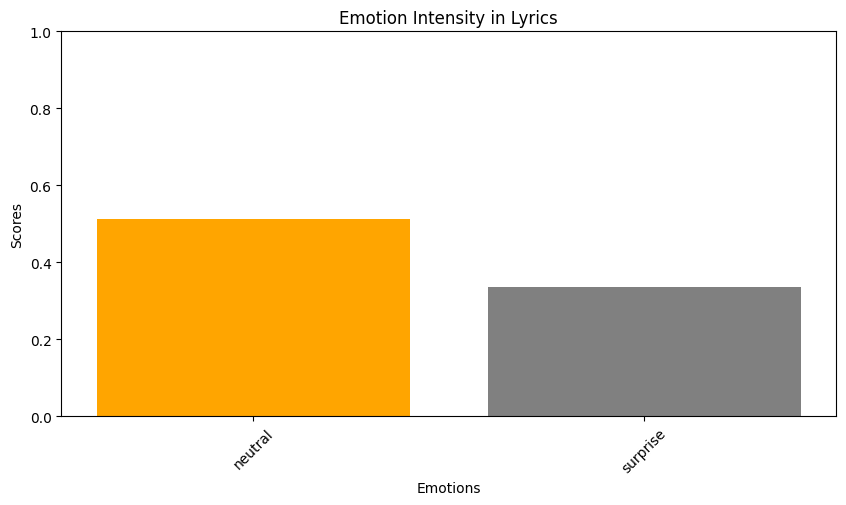

In [ ]:
import matplotlib.pyplot as plt

def plot_emotion_intensity(intensity_results):
    # Prepare data for plotting
    emotions = list(intensity_results.keys())
    scores = [result["score"] for result in intensity_results.values()]
    intensities = [result["intensity"] for result in intensity_results.values()]

    # Create a bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(emotions, scores, color=['blue' if intensity == "high" else 'orange' if intensity == "medium" else 'gray' for intensity in intensities])
    plt.title("Emotion Intensity in Lyrics")
    plt.xlabel("Emotions")
    plt.ylabel("Scores")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.show()

# Call the function to plot emotion intensity
plot_emotion_intensity(intensity_results)
